<a href="https://colab.research.google.com/github/Fernando2505/excel/blob/main/Medina_Coronado_Fernando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split as tts
import numpy as np 
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.tree import DecisionTreeClassifier as DTC
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import tensorflow as tf
from sklearn.metrics import recall_score, confusion_matrix

In [ ]:

"""
1)Establezca 2 modelos de clasificación para el data Iirs
"""
### Primer modelo(SVC)
print("El primer modelo es:")
data_iris= datasets.load_iris()
x1 = data_iris.data
y1 = data_iris.target
y1 = np.reshape(y1,(len(y1),1))
xtrain1, xtest1, ytrain1, ytest1 = tts(x1, y1, random_state=42, test_size=0.25)
modelo_svc = SVC(gamma='scale', random_state=42)
modelo_svc.fit(xtrain1, ytrain1)
ypredict1= modelo_svc.predict(xtest1)
matriz_confu1 = multilabel_confusion_matrix(ytest1, ypredict1)
print(matriz_confu1)
print("#"*100)
###Segundo modelo (DecisionTreeClassifier)
print('El segundo modelo es')
data_iris= datasets.load_iris()
x1_1 = data_iris.data
y1_1 = data_iris.target
y1_1= np.reshape(y1,(len(y1),1))
xtrain1_1, xtest1_1, ytrain1_1, ytest1_1 = tts(x1_1, y1_1, random_state=42, test_size=0.25)
modelo_svc_1 = DTC(random_state=42)
modelo_svc_1.fit(xtrain1_1, ytrain1_1)
ypredict1_1= modelo_svc.predict(xtest1_1)
matriz_confu1_1 = multilabel_confusion_matrix(ytest1_1, ypredict1_1)
print(matriz_confu1_1)


El primer modelo es:
[[[23  0]
  [ 0 15]]

 [[27  0]
  [ 0 11]]

 [[26  0]
  [ 0 12]]]
####################################################################################################
El segundo modelo es
[[[23  0]
  [ 0 15]]

 [[27  0]
  [ 0 11]]

 [[26  0]
  [ 0 12]]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-37.7996 , 144.9984 ],
       [-37.8079 , 144.9934 ],
       [-37.8093 , 144.9944 ],
       ...,
       [-37.85274, 144.88738],
       [-37.85908, 144.89299],
       [-37.81188, 144.88449]])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.494755,0.517651,0.1,0.111111,0.1,0.111111,0.000000,0.956418,0.0,0.25,0.086142,0.789474,0.969697,0.285714,0.051975,0.068577,0.10,0.125,0.000466
1,0.484031,0.513083,0.0,0.111111,0.0,0.111111,0.000000,0.444270,0.0,0.25,0.086142,0.824561,0.969697,0.285714,0.051975,0.068577,0.10,0.125,0.000360
2,0.482223,0.513997,0.0,0.222222,0.0,0.222222,0.000000,0.733647,0.0,0.75,0.086142,0.842105,0.969697,0.285714,0.051975,0.068577,0.15,0.250,0.000309
3,0.498243,0.516281,0.1,0.222222,0.1,0.222222,0.000000,0.673096,0.0,0.00,0.086142,0.842105,0.969697,0.285714,0.051975,0.068577,0.15,0.250,0.000217
4,0.484936,0.513723,0.2,0.333333,0.2,0.333333,0.000000,0.791583,0.0,1.00,0.580524,0.859649,0.969697,0.285714,0.051975,0.068577,0.15,0.125,0.000277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,0.357781,0.672246,0.2,0.333333,0.2,0.333333,0.964856,0.148838,0.0,0.25,0.059925,0.578947,0.000000,0.571429,0.347193,0.153531,0.20,0.250,0.001506
13576,0.417664,0.408601,0.2,0.222222,0.2,0.222222,0.974441,0.914555,0.0,0.75,0.940075,0.578947,0.000000,0.857143,0.141372,0.016377,0.15,0.250,0.000769
13577,0.426100,0.416221,0.4,0.222222,0.4,0.222222,0.974441,0.952755,0.0,0.25,0.726592,0.578947,0.000000,0.857143,0.141372,0.016377,0.15,0.250,0.001007
13578,0.417909,0.421346,0.5,0.333333,0.5,0.333333,0.974441,0.995066,0.0,0.00,0.831461,0.578947,0.000000,0.857143,0.141372,0.016377,0.20,0.125,0.002000


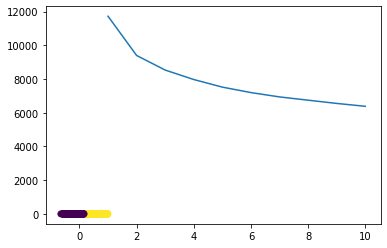

In [ ]:
"""
2.1)Evalúa 2 modelos: Uno con PCA y otro sin PCA para el modelo de clasificación del dataset melbournhouses
"""
df_casas = pd.read_csv("https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/melbournehouses.csv")
x_df2 = df_casas.drop(columns = ['YearBuilt','BuildingArea', 'Lattitude', 'Longtitude','Car', 'Rooms', 'Propertycount', 'Price' ])
x_df2 = x_df2.replace(np.nan, '0')
x_df2_2 =x_df2.drop(columns =['Suburb','Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'CouncilArea','Regionname' ])
###Separamos variables a analizar:
x_separado2_1 =df_casas['Lattitude']
x_separado2_2 =df_casas['Longtitude']
x_separado2_3 =df_casas['Car']
x_separado2_4 =df_casas['Rooms']
x_separado2_5 =df_casas['Propertycount']
x_separado2_6 =df_casas['Price']

x_separado2_7 =x_df2['Suburb']
x_separado2_8 =x_df2['Address']
x_separado2_9 =x_df2['Type']
x_separado2_10 =x_df2['Method']
x_separado2_11 =x_df2['SellerG']
x_separado2_12 =x_df2['Date']
x_separado2_13 =x_df2['CouncilArea']
x_separado2_14 =x_df2['Regionname']
#display(x_df2)
#display(x_df2_2)
###Rellenamos datos faltantes:
x_separado2_junto_1 =np.c_[x_separado2_1, x_separado2_2 ]
x2_1 = x_separado2_junto_1
imputer2_1 = SimpleImputer(missing_values = np.nan, strategy = "mean")
data2_1 = imputer2_1.fit_transform(x2_1)
display(data2_1)

x_separado2_junto_2 = np.c_[x_separado2_3, x_separado2_4]
x_car_2 = x_separado2_junto_2
imputer2_2 = SimpleImputer(missing_values = np.nan, strategy = "mean")
data2_2 = imputer2_2.fit_transform(x_car_2)
#dataframe_sin_y=pd.DataFrame(data2_2)
#display(dataframe_sin_y)
x_separado2_junto_3 = np.c_[x_separado2_5, x_separado2_6]
x_car_3 = x_separado2_junto_3
imputer2_3 = SimpleImputer(missing_values = np.nan, strategy = "mean")
data2_3 = imputer2_3.fit_transform(x_car_2)
###Codificamos:
encoder = LabelEncoder()
encode_1_2 = encoder.fit_transform(x_separado2_7)
encode_2_2 = encoder.fit_transform(x_separado2_8)
encode_3_2 = encoder.fit_transform(x_separado2_9)
encode_4_2 = encoder.fit_transform(x_separado2_10)
encode_5_2 = encoder.fit_transform(x_separado2_11)
encode_6_2 = encoder.fit_transform(x_separado2_12)
encode_7_2 = encoder.fit_transform(x_separado2_13)
encode_8_2 = encoder.fit_transform(x_separado2_14)
###Juntamos:
x2_junto_final = np.array(np.c_[data2_1, data2_2, data2_3, encode_1_2, encode_2_2, encode_3_2,  encode_4_2, encode_5_2, encode_6_2, encode_7_2,  encode_8_2, x_df2_2 ])
#display(dataframe_sin_y)
###Escalamos:
escalador_2 = MinMaxScaler() 
x_escalado_2 = escalador_2.fit_transform(x2_junto_final)
dataframe_sin_y=pd.DataFrame(x_escalado_2)
display(dataframe_sin_y)
#print(x_escalado_2[:5,:])
### Aplicamos el KMeas y visualizamos el codo de Jambu
from sklearn.cluster import KMeans
inercia =[]
for i in range(1,11):
  k_means = KMeans(n_clusters = i)
  k_means.fit(x_escalado_2)
  inercia.append(k_means.inertia_)
#Visualizar el codo de Jambu
plt.plot(range(1,11),inercia)
### K=2
k_means2 = KMeans(n_clusters = 2) 
k_means2.fit(x_escalado_2)
labels = k_means2.labels_
#display (labels)
### Para graficar, primero formamos el modelo de  PCA

pca2 = PCA(n_components = 2)
pca2.fit(x_escalado_2)
xpca2 = pca2.fit_transform(x_escalado_2)
#print(np.shape(xpca2))
#print(np.shape(labels))
plt.scatter(xpca2[:,0],xpca2[:,1],c = labels)
plt.show()


In [ ]:
"""
2.2)Evalúa 2 modelos: Uno con PCA y otro sin PCA para el modelo de clasificación del dataset melbournhouses
"""
df_casas = pd.read_csv("https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/melbournehouses.csv")
x_df2 = df_casas.drop(columns = ['YearBuilt','BuildingArea', 'Lattitude', 'Longtitude','Car', 'Rooms','Price'])#'Propertycount', 'Price' ])
x_df2 = x_df2.replace(np.nan, '0')
x_df2_2 =x_df2.drop(columns =['Suburb','Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'CouncilArea','Regionname' ])
###Separamos variables a analizar:
x_separado2_1 =df_casas['Lattitude']
x_separado2_2 =df_casas['Longtitude']
x_separado2_3 =df_casas['Car']
x_separado2_4 =df_casas['Rooms']
#x_separado2_5 =df_casas['Propertycount']
#x_separado2_6 =df_casas['Price']
y2 = np.array(df_casas['Price'])
y2 = np.reshape(y2,(len(y2),1))
x_separado2_7 =x_df2['Suburb']
x_separado2_8 =x_df2['Address']
x_separado2_9 =x_df2['Type']
x_separado2_10 =x_df2['Method']
x_separado2_11 =x_df2['SellerG']
x_separado2_12 =x_df2['Date']
x_separado2_13 =x_df2['CouncilArea']
x_separado2_14 =x_df2['Regionname']
#display(x_df2)
#display(x_df2_2)
###Rellenamos datos faltantes:
x_separado2_junto_1 =np.c_[x_separado2_1, x_separado2_2 ]
x2_1 = x_separado2_junto_1
imputer2_1 = SimpleImputer(missing_values = np.nan, strategy = "mean")
data2_1 = imputer2_1.fit_transform(x2_1)
display(data2_1)

x_separado2_junto_2 = np.c_[x_separado2_3, x_separado2_4]
x_car_2 = x_separado2_junto_2
imputer2_2 = SimpleImputer(missing_values = np.nan, strategy = "mean")
data2_2 = imputer2_2.fit_transform(x_car_2)

#dataframe_sin_y=pd.DataFrame(data2_2)
#display(dataframe_sin_y)
#x_separado2_junto_3 = np.c_[x_separado2_5, x_separado2_6]
#x_car_3 = x_separado2_junto_3
#imputer2_3 = SimpleImputer(missing_values = np.nan, strategy = "mean")
#data2_3 = imputer2_3.fit_transform(x_car_2)
###Codificamos:
encoder = LabelEncoder()
encode_1_2 = encoder.fit_transform(x_separado2_7)
encode_2_2 = encoder.fit_transform(x_separado2_8)
encode_3_2 = encoder.fit_transform(x_separado2_9)
encode_4_2 = encoder.fit_transform(x_separado2_10)
encode_5_2 = encoder.fit_transform(x_separado2_11)
encode_6_2 = encoder.fit_transform(x_separado2_12)
encode_7_2 = encoder.fit_transform(x_separado2_13)
encode_8_2 = encoder.fit_transform(x_separado2_14)
###Juntamos:
x2_junto_final = np.array(np.c_[data2_1, data2_2, encode_1_2, encode_2_2, encode_3_2,  encode_4_2, encode_5_2, encode_6_2, encode_7_2,  encode_8_2, x_df2_2 ])
#display(dataframe_sin_y)
###Escalamos:
escalador_2 = MinMaxScaler() 
x_escalado_2 = escalador_2.fit_transform(x2_junto_final)
dataframe_sin_y=pd.DataFrame(x_escalado_2)
display(dataframe_sin_y)
#print(x_escalado_2[:5,:])
xtrain2,xtest2,ytrain2,ytest2 = tts(x_escalado_2,y2)
ModeloClasificador = tf.keras.Sequential([
      tf.keras.Input(shape = (18,)),
      tf.keras.layers.Dense(200,activation = 'relu'),
      tf.keras.layers.Dense(100,activation = 'relu'),
      tf.keras.layers.Dense(50,activation = 'relu'),
      tf.keras.layers.Dense(25,activation = 'relu'),
      tf.keras.layers.Dense(10,activation = 'relu'),
      tf.keras.layers.Dense(1,activation = 'softmax')
])

ModeloClasificador.compile(loss = tf.keras.losses.binary_crossentropy,optimizer = tf.keras.optimizers.SGD(),
                           metrics = 'accuracy')

ModeloClasificador.fit(xtrain2,ytrain2,epochs = 100, verbose = False)

ypred_train = np.round(ModeloClasificador.predict(xtrain2),0)
ypred_test = np.round(ModeloClasificador.predict(xtest2),0)
print(ypred_train[0:4])
recall_clasificadortest = recall_score(ytest2,ypred_test)
recall_clasificadort = recall_score(ytrain2,ypred_train)
print(recall_clasificadort)
print(recall_clasificadortest)

array([[-37.7996 , 144.9984 ],
       [-37.8079 , 144.9934 ],
       [-37.8093 , 144.9944 ],
       ...,
       [-37.85274, 144.88738],
       [-37.85908, 144.89299],
       [-37.81188, 144.88449]])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.494755,0.517651,0.1,0.111111,0.000000,0.956418,0.0,0.25,0.086142,0.789474,0.969697,0.285714,0.051975,0.068577,0.10,0.125,0.000466,0.176160
1,0.484031,0.513083,0.0,0.111111,0.000000,0.444270,0.0,0.25,0.086142,0.824561,0.969697,0.285714,0.051975,0.068577,0.10,0.125,0.000360,0.176160
2,0.482223,0.513997,0.0,0.222222,0.000000,0.733647,0.0,0.75,0.086142,0.842105,0.969697,0.285714,0.051975,0.068577,0.15,0.250,0.000309,0.176160
3,0.498243,0.516281,0.1,0.222222,0.000000,0.673096,0.0,0.00,0.086142,0.842105,0.969697,0.285714,0.051975,0.068577,0.15,0.250,0.000217,0.176160
4,0.484936,0.513723,0.2,0.333333,0.000000,0.791583,0.0,1.00,0.580524,0.859649,0.969697,0.285714,0.051975,0.068577,0.15,0.125,0.000277,0.176160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,0.357781,0.672246,0.2,0.333333,0.964856,0.148838,0.0,0.25,0.059925,0.578947,0.000000,0.571429,0.347193,0.153531,0.20,0.250,0.001506,0.333769
13576,0.417664,0.408601,0.2,0.222222,0.974441,0.914555,0.0,0.75,0.940075,0.578947,0.000000,0.857143,0.141372,0.016377,0.15,0.250,0.000769,0.286482
13577,0.426100,0.416221,0.4,0.222222,0.974441,0.952755,0.0,0.25,0.726592,0.578947,0.000000,0.857143,0.141372,0.016377,0.15,0.250,0.001007,0.286482
13578,0.417909,0.421346,0.5,0.333333,0.974441,0.995066,0.0,0.00,0.831461,0.578947,0.000000,0.857143,0.141372,0.016377,0.20,0.125,0.002000,0.286482


[[nan]
 [nan]
 [nan]
 [nan]]


ValueError: ignored

(150930, 6)
(150930, 1)
Normalizer()


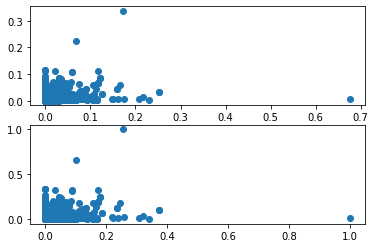

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


El r**2 de la prueba es  0.6723429010442283
####################################################################################################
El r**2 del entrenamiento es  0.954379803870984


'\nSI EXISTE SOBREAJUSTE\n'

In [ ]:
"""
3)¿Existe sobreajuste al aplicar un modelo de RF con n = 200 para el modelo de wine.csv? 
"""
vino = pd.read_excel('/content/drive/MyDrive/examen final/wine.xlsx')
x_df3 = vino.drop(columns = ['Unnamed: 0',	'points', 'designation', 'winery', 'region_2'])
x_df3 = x_df3.replace(np.nan, '0')
#display(x_df3)
xsin_transformar_3 =x_df3['price']
x1_3 = x_df3['country']
x2_3 = x_df3['description']
x3_3 = x_df3['province']
x4_3 = x_df3['region_1']
x5_3 = x_df3['variety']
encoder = LabelEncoder()
encode_1_3 = encoder.fit_transform(x1_3)
encode_2_3 = encoder.fit_transform(x2_3)
encode_3_3 = encoder.fit_transform(x3_3)
encode_4_3 = encoder.fit_transform(x4_3)
encode_5_3 = encoder.fit_transform(x5_3)

x_juntos_3 = np.c_[xsin_transformar_3, encode_1_3, encode_2_3,  encode_3_3, encode_4_3, encode_5_3]

x_usar_3 =np.array(x_juntos_3)
print(np.shape(x_usar_3))
y_usar_3 = np.array(vino['points'])
y_usar_3 = np.reshape(y_usar_3,(len(y_usar_3),1))
print(np.shape(y_usar_3))

###Normalizamos por la variable price que tiene muchos ceros
normalizador1 = Normalizer()
print(normalizador1)
normalizador1.fit(x_usar_3)
x_features_normalizados_3 = normalizador1.transform(x_usar_3)
#print(x_features_normalizados_3[:5,:])
#print('#'*100)

###Escalamos
escalador_3 = MinMaxScaler() 
x_escalado_3 = escalador_3.fit_transform(x_features_normalizados_3)
#print(x_escalado_3[:5,:])

fig,ax = plt.subplots(2,1)
ax[0].scatter(x_features_normalizados_3[:,0],x_features_normalizados_3[:,1])
ax[1].scatter(x_escalado_3[:,0],x_escalado_3[:,1])
plt.show()

###Formamos el modelo
xtrain3_3, xtest3_3, ytrain3_3, ytest3_3 = tts(x_escalado_3, y_usar_3, random_state=42, test_size=0.25)
modelo_RFR_3 = RFR(n_estimators = 200, random_state=42)
modelo_RFR_3.fit(xtrain3_3, ytrain3_3)
###Verificamos si hay sobreajuste o no:
ypredict3_3= modelo_RFR_3.predict(xtest3_3)
r2_RFR_3 = r2_score(ytest3_3, ypredict3_3)
print('El r**2 de la prueba es ', r2_RFR_3)
print('#'*100)

ypred_train =modelo_RFR_3.predict(xtrain3_3)
r2_RFR_3_1 = r2_score(ytrain3_3, ypred_train)
print('El r**2 del entrenamiento es ', r2_RFR_3_1)

#####
"""
SI EXISTE SOBREAJUSTE
"""
#####


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


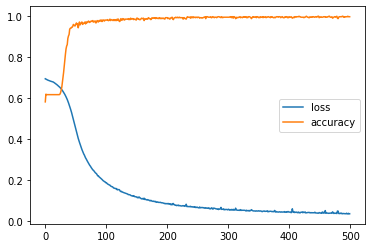

In [ ]:
"""
4)Puedes graficar un modelo de deep leraning para la dataset de breast-cancer
"""
df_cancer = pd.read_csv("https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/breast-cancer.csv")
x_df4 = df_cancer.drop(columns = ['id', 'diagnosis'])
#display(x_df4)
y4 = np.array(df_cancer['diagnosis'])
Encoder = LabelEncoder()
y4 = Encoder.fit_transform(y4)
y4 = np.reshape(y4,(len(y4),1))
#print(y4[:4])
#print(np.shape(y4))
### Escalamos:
escalar4 = MinMaxScaler()
x4 = np.array(x_df4)
x4 = escalar4.fit_transform(x4)
#print(x4[0:4,:])
### Formamos el modelo:
xtrain4,xtest4,ytrain4,ytest4 = tts(x4,y4)

ModeloClasificador = tf.keras.Sequential([
      tf.keras.Input(shape = (30,)),
      tf.keras.layers.Dense(30,activation = 'relu'),
      tf.keras.layers.Dense(60,activation = 'relu'),
      tf.keras.layers.Dense(30,activation = 'relu'),
      tf.keras.layers.Dense(10,activation = 'relu'),
      tf.keras.layers.Dense(4,activation = 'relu'),
      tf.keras.layers.Dense(2,activation = 'relu'),
      tf.keras.layers.Dense(1,activation = 'sigmoid')
])

ModeloClasificador.compile(loss = tf.keras.losses.binary_crossentropy,optimizer = tf.keras.optimizers.SGD(),
                           metrics = 'accuracy')

historico4 = ModeloClasificador.fit(xtrain4,ytrain4,epochs = 500, verbose = False)
pd.DataFrame(historico4.history).plot()

In [ ]:
"""
5)Crea una función que aplane la ruta de una imágen
"""
images =[]
def aplanar():
  global images
  im = plt.imread(input("ingrese el link de la imagen a aplanar en formato JPG: "))
  vector = im.flatten()
  images.append(vector)
  display(images)
  







In [ ]:
aplanar()

ingrese el link de la imagen a aplanar en formato JPG: /content/drive/MyDrive/trabajo python/minion.jpg


[array([  3,  25,  46, ..., 116, 150, 185], dtype=uint8),
 array([  3,  25,  46, ..., 116, 150, 185], dtype=uint8)]

In [ ]:
display(images)

[array([  3,  25,  46, ..., 116, 150, 185], dtype=uint8)]